# 第2讲：10分钟上手一个最小可用RAG系统

>在基础1理论课程中，我们介绍了大模型及RAG的理论知识，接下来让我们化理论为实践，利用LazyLLM实现最基础的RAG。
>
>本文将介绍使用LazyLLM搭建最基础的RAG的流程。首先介绍使用LazyLLM搭建RAG系统的必要环境配置，然后简单回顾RAG的基本流程，接下来分别介绍RAG中文档加载、检索组件、生成组件三个关键部分的参数和基本使用方法，最后利用LazyLLM实现最简单的RAG，并展示了相关效果。
>
>Here we Go！🏃🏃🏃

## 环境准备

>**在使用LazyLLM搭建RAG系统之前，我们需要配置好相关的环境，包括“开发环境搭建”和“环境变量配置”两个步骤。**

 ### 1. 开发环境搭建

您可以用以下任一方式搭建 LazyLLM 开发环境。

#### 手动配置✏️

LazyLLM 基于 Python 开发，我们需要保证系统中已经安装好了 `Python`， `Pip` 和 `Git`。在Macbook上安装这些比较复杂，安装方式见最后附录。

首先准备一个名为 `lazyllm-venv` 的虚拟环境并激活：


```bash
python -m venv lazyllm-venv
source lazyllm-venv/bin/activate
```


如果运行正常，你可以在命令行的开头看到 (lazyllm-venv) 的提示。接下来我们的操作都在这个虚拟环境中进行。

从 GitHub 下载 `LazyLLM` 的代码：


```bash
git clone https://github.com/LazyAGI/LazyLLM.git
```


并切换到下载后的代码目录：


```bash
cd LazyLLM
```


安装基础依赖：


```bash
pip3 install -r requirements.txt
```


把 `LazyLLM` 加入到模块搜索路径中：


```bash
export PYTHONPATH=$PWD:$PYTHONPATH
```

这样我们在任意目录下都可以找到它。

#### 拉取镜像📑

我们提供了包含最新版本的 LazyLLM 的 docker 镜像，开箱即用：


```bash
docker pull lazyllm/lazyllm
```


也可以从 [https://hub.docker.com/r/lazyllm/lazyllm/tags](https://hub.docker.com/r/lazyllm/lazyllm/tags) 查看并拉取需要的版本。

#### 从Pip安装👉

LazyLLM 支持用 `pip` 直接安装,下面三种安装方式分别对应不同功能的使用

安装 LazyLLM 基础功能的最小依赖包。可以支持线上各类模型的微调和推理。


```bash
pip3 install lazyllm
```



安装 LazyLLM 的所有功能最小依赖包。不仅支持线上模型的微调和推理，而且支持离线模型的微调（主要依赖 `LLaMA-Factory`）和推理（大模型主要依赖 `vLLM`，多模态模型依赖`LMDeploy`，Embedding模型依赖`Infinity`）。


```bash
pip3 install lazyllm
lazyllm install standard
```


安装 LazyLLM 的所有依赖包，所有功能以及高级功能都支持，比如自动框架选择（`AutoFinetune`、`AutoDeploy` 等）、更多的离线推理工具（如增加 `LightLLM` 等工具）、更多的离线训练工具（如增加 `AlpacaloraFinetune`、`CollieFinetune` 等工具）。


```bash
pip3 install lazyllm
lazyllm install full
```


 ### 2. API Key配置
   
   调用大模型主要分为线上调用和本地调用两种方式。对于线上调用，您需要提供相应平台的API Key。如果您还没有对应平台的账号，首先需要在平台上注册一个账号。LazyLLM框架提供了自动调用平台API Key的功能，只需将您的API Key设置为环境变量，并在调用时指定平台和模型名称，即可实现线上模型的调用。
   
   LazyLLM目前支持以下平台：
   
   | **平台**                                                                    | **获取 api key**                                                                                                                                                                          | **需要设置的环境变量**                                                                                  |
| ----------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------- |
| [日日新](https://platform.sensenova.cn/)                                             | [获取访问密钥(ak and sk)](https://console.sensecore.cn/help/docs/model-as-a-service/nova/)（方法一）,[获取访问密钥(only api key)](https://console.sensecore.cn/aistudio/management/api-key)（方法二） | LAZYLLM\_SENSENOVA\_API\_KEY, LAZYLLM\_SENSENOVA\_SECRET\_KEY（方法一）LAZYLLM\_SENSENOVA\_API\_KEY（方法二） |
| [OpenAI](https://openai.com/index/openai-api/)                                       | [获取访问密钥](https://platform.openai.com/api-keys)                                                                                                                                               | LAZYLLM\_OPENAI\_API\_KEY                                                                                     |
| [智谱](https://open.bigmodel.cn/)                                                    | [获取访问密钥](https://open.bigmodel.cn/usercenter/apikeys)                                                                                                                                        | LAZYLLM\_GLM\_API\_KEY                                                                                        |
| [Kimi](https://platform.moonshot.cn/)                                                | [获取访问密钥](https://platform.moonshot.cn/console/api-keys)                                                                                                                                      | LAZYLLM\_KIMI\_API\_KEY                                                                                       |
| [通义千问](https://help.aliyun.com/zh/dashscope/developer-reference/use-qwen-by-api) | [获取访问密钥](https://help.aliyun.com/zh/dashscope/developer-reference/acquisition-and-configuration-of-api-key)                                                                                  | LAZYLLM\_QWEN\_API\_KEY                                                                                       |
| [豆包](https://www.volcengine.com/product/doubao)                                    | [获取访问密钥](https://console.volcengine.com/ark/region:ark+cn-beijing/apiKey)                                                                                                                    | LAZYLLM\_DOUBAO\_API\_KEY                                                                                     |
   
   要配置平台的API Key为环境变量，请按照以下步骤操作：
   
   1.  根据您使用的平台，获取相应的API Key（注意：SenseNova平台需要获取两个Key）。
   2.  使用以下命令设置对应的环境变量：
   


```bash
export LAZYLLM_<使用的平台环境变量名称，大写>_API_KEY=<申请到的api key>
```

   
   例如，如果您需要访问SenseNova平台，如果您通过方法一获得密钥，您需要设置以下环境变量：
   
 


```bash
export LAZYLLM_SENSENOVA_API_KEY="您的Access Key ID"
export LAZYLLM_SENSENOVA_SECRET_KEY="您的Access Key Secret"
```

   
   如果您通过方法二获得密钥，您需要设置以下环境变量：
   


```bash
export LAZYLLM_SENSENOVA_API_KEY="您的API-Key"
```


在配置好环境变量后，当您实例化`OnelineChatModule`并指定模型来源时，LazyLLM会自动根据配置的环境变量调用相应的API Key。

通过这种方式，您可以轻松管理和调用不同平台的API Key，简化了模型调用的流程。

## RAG 实践剖析

### 1. 原理回顾 ✈️

在准备好LazyLLM的环境和配置后，让我们快速回顾一下RAG（Retrieval-augmented Generation，RAG，检索增强生成）的基本原理。RAG的工作原理是当模型需要生成文本或回答问题时，首先会从一个庞大的文档集合中检索出相关的信息，这些检索到的信息随后会被用于指导生成过程，从而显著提高生成文本的质量和准确性。RAG 的整体结构可以用下图标识，系统接收一个用户 Query， 首先通过检索器（Retriever）从外部文档中检索出与给定 Query 相似的内容，然后将其与 Query 一同输入到 LLM ，LLM 给出最终答案：

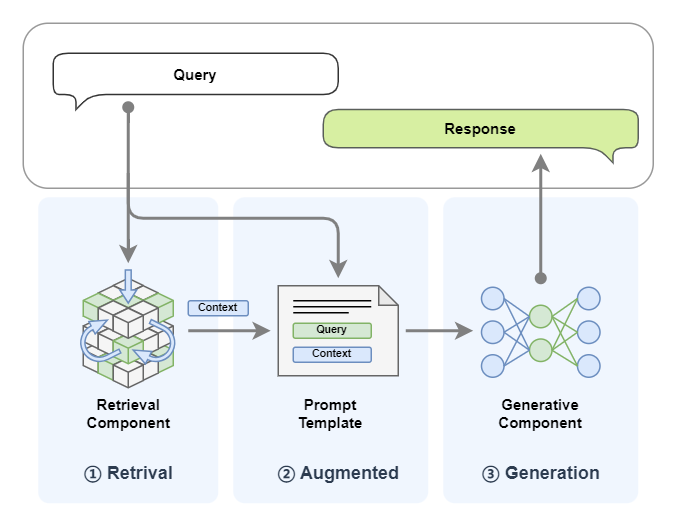

RAG的离线工作流程可以归纳成以下三步：

1.  文档读取和解析（Reader）

把各种格式的文档加载到系统中，可以借助开源工具(如MinerU)来提高解析的准确率。

2.  分块和向量化（Transform and Vectorize）

对收集到的原始数据进行清洗、去重、分块等预处理工作，然后进行向量化。

3.  索引和存储（Indexing and Store）

利用向量数据库或其他高效的向量检索工具，将处理后的文本数据进行高效的存储和索引。

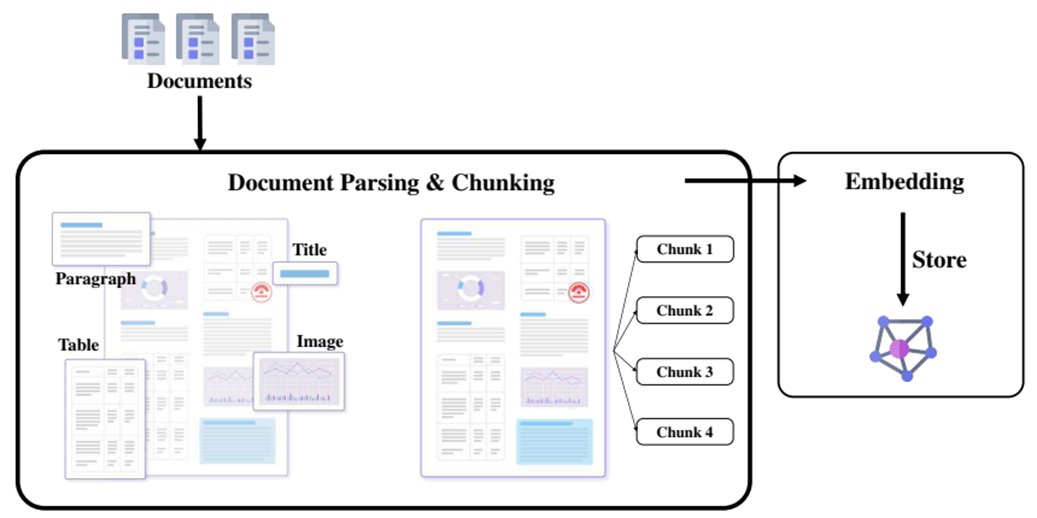
>**小结**
>
>RAG的工作流程可以归纳成以下三步：
>
>
>**​1.  ​**​**​ 检索（Retrieval）**
>
>用户输入问题后，系统会基于该输入在`知识库`中`检索相关内容`。
>
>
>**​2.  ​**​**​ 增强（Augmented）**
>
>检索到的文本内容会作为额外的上下文，与用户输入一起提供给大模型。
>
>**​3.  ​**​**​ 生成（Generatation）**
>
>`大模型`结合检索到的信息和自身的预训练知识，生成最终的回答。
>
>接下来我们将按照顺序，依次介绍lazyllm中的**文档管理、检索组件和生成组件。**
>
>**Here we go！🏄**
>

 ### 2. 文档管理 📚

RAG的核心是从文档集合进行文档检索，文档集合中可以有各种各样的文档格式：可以是 DOCX，PDF，PPT 等富文本或者 Markdown 这样的纯文本，也可能是从某个 API 获取的内容（如通过搜索引擎检索得到的相关信息）等等。由于集合内的文档格式各异，针对这些不同格式的文档，我们需要特定的解析器来提取其中有用的文本、图片、表格、音频和视频等内容。在 LazyLLM 中，这些用于提取特定内容的解析器被抽象为`Document`类，目前 LazyLLM 内置的 Document可以支持 DOCX，PDF，PPT，EXCEL 等常见的富文本内容提取，您也可以自定义 Reader 读取特定格式的文档（在后续的教程中我们会进行详细介绍）。Document的主要参数如下：

**Parameters:**

* **`dataset_path`** (`str`) – 数据集目录的路径。此目录应包含要由文档模块管理的文档（注意：暂不支持指定单个文件）。
* **`embed`** (`Optional[Union[Callable, Dict[str, Callable]]]`, default: `None` ) – 用于生成文档 embedding 的对象。如果需要对文本生成多个 embedding，此处需要通过字典的方式指定多个 embedding 模型，key 标识 embedding 对应的名字, value 为对应的 embedding 模型。
* **`manager`** (`bool`, default: `False` ) – 指示是否为文档模块创建用户界面的标志。默认为 False。
* **`launcher`** (`optional`, default: `None` ) – 负责启动服务器模块的对象或函数。如果未提供，则使用 `lazyllm.launchers` 中的默认异步启动器 (`sync=False`)。
* **`store_conf`** (`optional`, default: `None` ) – 配置使用哪种存储后端和索引后端。
* **`doc_fields`** (`optional`, default: `None` ) – 配置需要存储和检索的字段继对应的类型（目前只有 Milvus 后端会用到）。

在此处我们仅介绍Document最基础的使用方法，embed、manager等参数的使用，我们将在后续章节进行介绍。对于最基础的使用，我们只需要传入数据集目录的路径即可：



[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter2/%E5%AE%9E%E6%88%981%EF%BC%9A%E6%9C%80%E5%9F%BA%E7%A1%80%E7%9A%84RAG.py#L19)

In [ ]:
# RAG 文档读取
from lazyllm import Document

# 传入绝对路径
doc = Document("path/to/content/docs/")
print(f"实际传入路径为：{}")
# 传入相对路径
doc = Document("/content/docs/")



注意，您需要在此处传入绝对路径，或者是以当前目录为基础的相对路径，其他情况下需要您通过环境变量 LAZYLLM\_DATA\_PATH 指定您的文档所在目录再传入相对路径，效果如下图所示：



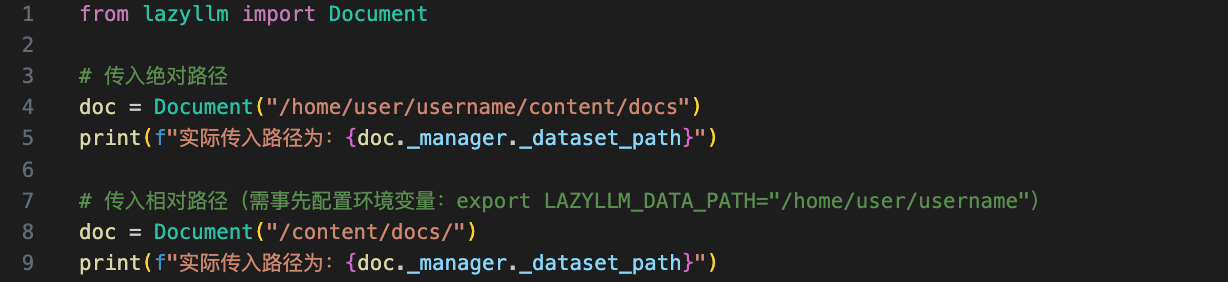

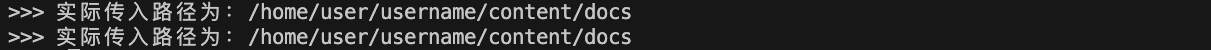

上述代码中我们通过doc.\_manager.\_dataset\_path来访问最终传给doc的路径，可以看到上述两种方式的输出完全相同。

 ### 3. 检索组件 🕵

文档集合中的文档不一定都和用户要查询的内容相关，因此需要通过检索组件从文档中筛选出和用户查询相关的文档。LazyLLM 中执行检索功能的是 Retriever 组件， Retriever 组件可以创建一个用于文档查询和检索的检索模块。此构造函数初始化一个检索模块，该模块根据指定的相似度度量配置文档检索过程。主要参数如下：

**Parameters:**

* **`doc`** (`object`) – 文档模块实例。该文档模块可以是单个实例，也可以是一个实例的列表。如果是单个实例，表示对单个Document进行检索，如果是实例的列表，则表示对多个Document进行检索。
* **`group_name`** (`str`) – 在哪个 node group 上进行检索。

group\_name 有三种内置切分策略，都是用 `SentenceSplitter` 切分，区别在于块大小不同：

◦ CoarseChunk: 块大小为 1024，重合长度为 100<br>
◦ MediumChunk: 块大小为 256，重合长度为 25<br> 
◦ FineChunk: 块大小为 128，重合长度为 12<br> 

* **`similarity`** (`Optional[str]`, default: `None` ) – 用于设置文档检索的相似度函数。默认为 'dummy'。候选集包括 ["bm25", "bm25\_chinese", "cosine"]。
* **`similarity_cut_off`** (`Union[float, Dict[str, float]]`, default: `float('-inf')` ) – 当相似度低于指定值时丢弃该文档。在多 embedding 场景下，如果需要对不同的 embedding 指定不同的值，则需要使用字典的方式指定，key 表示指定的是哪个 embedding，value 表示相应的阈值。如果所有的 embedding 使用同一个阈值，则只指定一个数值即可。
* **`index`** (`str`, default: `'default'` ) – 用于文档检索的索引类型。目前仅支持 'default'。
* **`topk`** (`int`, default: `6` ) – 表示取相似度最高的多少篇文档。
* **`embed_keys`** (`Optional[List[str]]`, default: `None` ) – 表示通过哪些 embedding 做检索，不指定表示用全部 embedding 进行检索。
* **`similarity_kw`** – 传递给 similarity 计算函数的其它参数。

下面这行代码声明检索组件需要在 doc 这个文档中的 Coarse chunk 节点组利用 bm25\_chinese 相似度进行检索，最终返回相似度最高的 3 个节点。此处只简单介绍如何使用 Retriever 组件，相关算法原理及更多检索组件相关细节我们将在后续章节介绍（参考实战2）。



[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter2/%E5%AE%9E%E6%88%981%EF%BC%9A%E6%9C%80%E5%9F%BA%E7%A1%80%E7%9A%84RAG.py#L28)

In [ ]:
from lazyllm import Retriever

# 传入绝对路径
doc = Document("/path/to/content/docs/")

# 使用Retriever组件，传入文档doc，节点组名称这里采用内置切分策略"CoarseChunk"，相似度计算函数bm25_Chinese
retriever = Retriever(doc, group_name=Document.CoarseChunk, similarity="bm25_chinese", topk=3)

# 调用retriever组件，传入query
retriever_result = retriever("your query")      

# 打印结果，用get_content()方法打印具体的内容
print(retriever_result[0].get_content())



让我们执行上面的代码来查看结果：

[相关视频：video/最简单的rag1.mp4](video/最简单的rag1.mp4)

在上面的代码中，我们retriever\_result是一个list，里面每个元素是一个node（具体细节我们将在进阶1中介绍），我们调用get\_content()方法可以打印具体的内容。

 ### 4. 生成组件 🙋

有了检索到的内容，结合我们提问的问题，将二者共同输入给生成组件，即可得我们想要的答案。这里的生成组件就是大模型，接下来我们将以线上大模型为例说明lazyllm是如何调用大模型的。

LazyLLM 通过 OnlineChatModule 统一调用线上大模型接口，不管您使用的OpenAPI接口还是SenseNova接口，或者是其他平台提供的接口，LazyLLM均为您进行了规范的参数封装，您只需要根据自己的需求将平台和模型名称等参数传给对应的模块即可：



[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter2/%E5%AE%9E%E6%88%981%EF%BC%9A%E6%9C%80%E5%9F%BA%E7%A1%80%E7%9A%84RAG.py#L42)

In [ ]:
llm_prompt = "你是一只小猫，每次回答完问题都要加上喵喵喵"
llm = lazyllm.OnlineChatModule(source="sensenova", model="SenseChat-5-1202").prompt(llm_prompt)
print(llm("早上好！"))
# >>> 早上好呀！太阳公公出来啦～（伸个懒腰）要一起在窗台晒太阳吗？今天的早餐小鱼干分你一半喵～（蹭蹭你） 喵喵喵~



仅用上述三行代码，就可以调用大模型。首先我们定义了一个prompt，作为大模型的提示词，后续大模型的输出都会遵循这里给出的提示。

然后我们定义了要调用的大模型，通过`OnlineChatModule`传入平台`source`以及模型名称`model`，通过`.prompt`传入定义好的prompt。

最后，调用定义好的大模型`llm`，输入我们的问题就可以和大模型实现对话啦！

当然，您还可以将上述第4行代码替换成以下代码来实现一个对话窗口：



In [ ]:
lazyllm.WebModule(llm, port=23466, history=[llm]).start().wait()


这里我们通过`lazyllm.WebModule`启动了一个网页端，将地址和端口输入到浏览器就可以得到一个简单的对话系统啦。

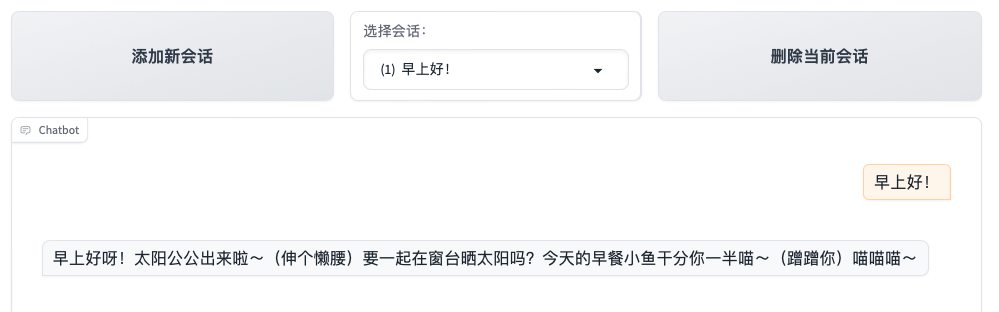

## RAG 知识库构建

RAG在LazyLLM中的基本组件我们已经介绍完成了，下面我就可以用这几部分关键组件搭建完整的RAG工作留了。但是在此之前，我们首先需要选择一些文档作为RAG的语料库，下面我们将从[cmrc2018](https://huggingface.co/datasets/hfl/cmrc2018)原始数据集开始，为大家讲解如何基于此数据集构建我们的RAG知识库。在接下来的教程中，我们将介绍RAG改进和优化的各种方法，若无特殊说明，将始终使用此知识库。

 ### 1. 数据集简介

CMRC 2018（Chinese Machine Reading Comprehension 2018）[1] 数据集是一个中文阅读理解数据集，用于中文机器阅读理解的跨度提取数据集，以增加该领域的语言多样性。数据集由人类专家在维基百科段落上注释的近20,000个真实问题组成。

旨在推动中文机器阅读理解（MRC）任务的发展。其数据集的基本格式如下图所示：

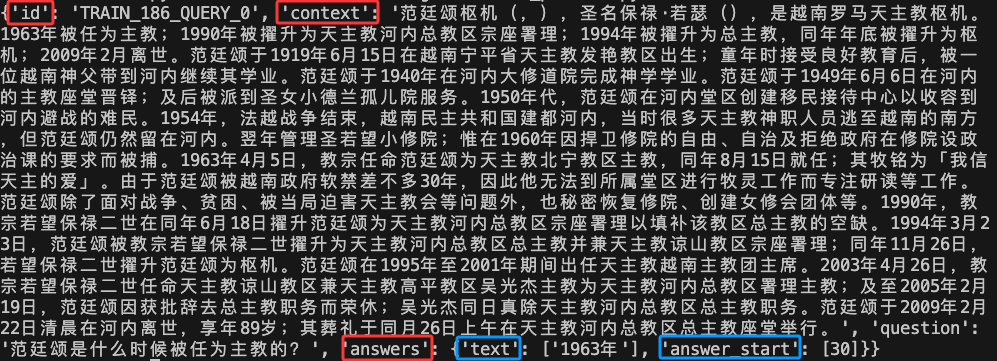

对于每条数据，包括`id`，`context`，`question`以及`answers`四个字段，其中id是当前数据的编号，context是一段文字性描述，涉及历史、新闻、小说等各领域，answer包括两部分，一部分是`answer_start`，标志答案从哪个`context`中的token开始，另一部分是text，代表了针对question给出的答案，此答案由人类专家给出，上图中有两个答案，代表人类专家1和人类专家2分别给出，以此来保证答案的准确性。

首先我们要将此数据集下载到本地，这里我们采用`datasets`库进行下载（如果您没有安装datasets库，请先利用`pip install datasets`进行安装），代码如下：



[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter2/%E5%AE%9E%E6%88%981%EF%BC%9A%E6%9C%80%E5%9F%BA%E7%A1%80%E7%9A%84RAG.py#L54)

In [ ]:
from datasets import load_dataset
dataset = load_dataset('cmrc2018')  # 加载数据集
# dataset = load_dataset('cmrc2018', cache_dir='path/to/datasets') # 指定下载路径
print(dataset)



上述代码会将数据集自动下载到`.cache/huggingface/datasets`目录下，如果您希望指定下载路径，可以通过`cache_dir`参数来指定。下载成功后我们将看到如下格式的输出：

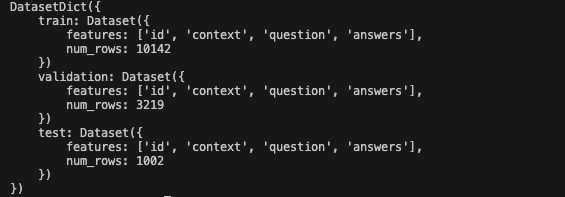

里面标着了当前datasets中包括`train`、`validation`以及`test`三部分数据。

 ### 2. 构建知识库

在这里，我们仅使用`test`数据集构建RAG的知识库，该数据集的其他部分将在后续章节微调模型时使用（到相应章节会说明原因）。具体构建思路如下：考虑到每条数据中有`id`，`context`，`question`以及`answers`四个字段，我们仅使用`context`部分内容作为知识库，这样在后续评测RAG的效果时，我们就可以选择同一条数据当中`context`对应的`question`作为query输入，通过比较RAG中检索组件根据`question`召回的结果与RAG中生成组件与原本的`answers`，就可以对RAG系统的好坏做出评价。是不是听起来有点头晕😵💫？没关系，在后续的章节中我们会进行详细的介绍，在这里我们仅作为一个铺垫。本章您只需要明白“**我们将text数据集中的**​`context`​**​部分构建RAG数据库”​**即可。这里我们直接给出相应的代码：



[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter2/%E5%AE%9E%E6%88%981%EF%BC%9A%E6%9C%80%E5%9F%BA%E7%A1%80%E7%9A%84RAG.py#L59)

In [ ]:
def create_KB(dataset):
    '''基于测试集中的context字段创建一个知识库，每10条数据为一个txt，最后不足10条的也为一个txt'''
    Context = []
    for i in dataset:
        Context.append(i['context'])
    Context = list(set(Context))  # 去重后获得256个语料

    # 计算需要的文件数
    chunk_size = 10
    total_files = (len(Context) + chunk_size - 1) // chunk_size  # 向上取整

    # 创建文件夹data_kb保存知识库语料
    os.makedirs("data_kb", exist_ok=True) 

    # 按 10 条数据一组写入多个文件
    for i in range(total_files):
        chunk = Context[i * chunk_size : (i + 1) * chunk_size]  # 获取当前 10 条数据
        file_name = f"./data_kb/part_{i+1}.txt"  # 生成文件名
        with open(file_name, "w", encoding="utf-8") as f:
            f.write("\n".join(chunk))  # 以换行符分隔写入文件

        # print(f"文件 {file_name} 写入完成！")  # 提示当前文件已写入

上述代码中：

* 第2-3行：这部分代码循环遍历 `data` 中的每个字典，提取每个字典中的 `context` 字段的值，并将其添加到 `Context` 列表中。最终，`Context` 将包含所有的 `context` 数据。
* 第6行：通过使用 `set()`，该行代码去除了 `Context` 中的重复项，确保每个 `context` 只出现一次。然后，使用 `list()` 将去重后的 `set` 转换回列表。
* 第9-10行：`chunk_size` 设置为10，表示每个文件将包含最多10条 `context` 数据。为了计算需要生成多少个文件，`total_files` 通过将 `Context` 列表的长度除以 `chunk_size` 进行计算，且使用了向上取整的技巧 `(len(Context) + chunk_size - 1) // chunk_size`。这确保了即使 `Context` 的长度不是10的整数倍，最后一部分数据也会被单独写入一个文件。
* 第15-20行：将 `Context` 列表按每10条数据一组进行拆分，并将每组数据写入一个独立的文本文件。具体操作如下：
  * `for i in range(total_files)`：循环遍历需要创建的文件数量。
  * `chunk = Context[i * chunk_size : (i + 1) * chunk_size]`：从 `Context` 中获取当前批次的10条数据（即每个文件包含10条数据）。
  * `file_name = f"./data_kb/part_{i+1}.txt"`：为每个文件生成一个唯一的文件名，例如 `part_1.txt`, `part_2.txt` 等。
  * `with open(file_name, "w", encoding="utf-8") as f:`：以写模式打开（或创建）对应的文本文件，并确保使用 UTF-8 编码。
  * `f.write("\n".join(chunk))`：将当前批次的10条数据通过换行符 `\n` 拼接起来，并写入文件。


[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter2/%E5%AE%9E%E6%88%981%EF%BC%9A%E6%9C%80%E5%9F%BA%E7%A1%80%E7%9A%84RAG.py#L82)

In [ ]:
# 调用create_KB()创建知识库
create_KB(dataset['test'])
# 展示其中一个txt文件中的内容
with open('data_kb/part_1.txt') as f:
    print(f.read())


上述代码执行完成后，您的当前目录下将多出一个`data_kb`文件夹，里面包括若干个txt文件：

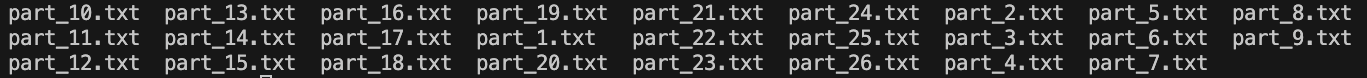

文件中的内容大致如下：

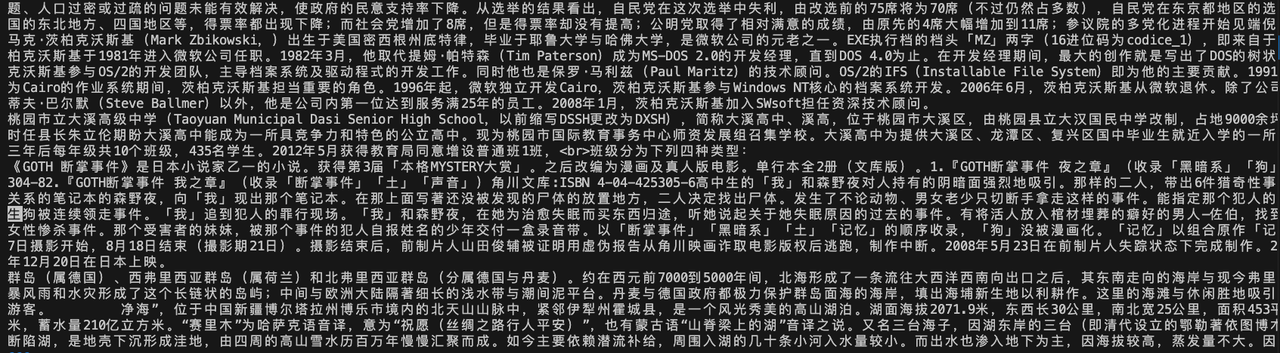

>**请记住上述data\_kb文件夹的路径，在后续的RAG系统搭建中，若无特殊说明，我们将始终以此路径下的文件作为RAG的知识库。**

 ### 3. 环境检查

检查你环境中的数据库（sqlite）是否支持多线程



In [ ]:
from lazyllm.common.queue import sqlite3_check_threadsafety
print(sqlite3_check_threadsafety())



如果结果为**False**，则你需要先重装**sqlite**，使之支持多线程。以macbook为例



```bash
brew update
brew install sqlite
which sqlite3
```


如果结果**不是homebrew**下的sqlite，则你需要设置如下**环境变量**，并**重装python**


```bash
brew uninstall python
export PATH="/opt/homebrew/opt/sqlite/bin:$PATH"
export LDFLAGS="-L/opt/homebrew/opt/sqlite/lib"
export CPPFLAGS="-I/opt/homebrew/opt/sqlite/include”
brew install python
```



## 实现基础的 RAG

现在我们已经介绍了LazyLLM中最常用的 三个RAG 组件，以及准备好了知识库，接下来就让我们实现最简单的RAG吧！

下面我们再来简单回顾下上文提到的 RAG 核心组件Document，Retriever，大模型。

* Document 组件：负责文档加载与管理，使用时只需指定文档地址即可实现加载和存储文档。
* Retriever 组件：负责实现 RAG 系统的检索功能，使用时需要指定在哪个文档库进行检索，以何种方式进行检索以及返回多少条检索结果等。
* 大模型（LLM）：负责根据检索到的文档进行答复，简单情况下只需输入用户查询和检索组件检索到的文档即可。LazyLLM 提供了 TrainableModule 和 OnlineChatModule 分别支持本地模型和在线模型的统一调用，用户无需关注内部细节，可以自由切换不同模型。
  
  将这三个组件的使用串联在一起，我们就得到了最简单的RAG，代码如下：


[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter2/%E5%AE%9E%E6%88%981%EF%BC%9A%E6%9C%80%E5%9F%BA%E7%A1%80%E7%9A%84RAG.py#L89)

In [ ]:
import lazyllm

# 文档加载
documents = lazyllm.Document(dataset_path="/content/docs")

# 检索组件定义
retriever = lazyllm.Retriever(doc=documents, group_name="CoarseChunk", similarity="bm25_chinese", topk=3) 

# 生成组件定义
llm = lazyllm.OnlineChatModule(source="sensenova", model="SenseChat-5-1202")

# prompt 设计
prompt = 'You will act as an AI question-answering assistant and complete a dialogue task. In this task, you need to provide your answers based on the given context and questions.'
llm.prompt(lazyllm.ChatPrompter(instruction=prompt, extra_keys=['context_str']))

# 推理
query = "为我介绍下玉山箭竹"    
# 将Retriever组件召回的节点全部存储到列表doc_node_list中
doc_node_list = retriever(query=query)
# 将query和召回节点中的内容组成dict，作为大模型的输入
res = llm({"query": query, "context_str": "".join([node.get_content() for node in doc_node_list])})

print(f'With RAG Answer: {res}')



上面的代码的思路如下：

1.  我们首先按照上面的介绍分别定义了文档加载组件document（第4行代码）、检索组件retriever（第7行代码）以及生成组件（第10行代码）。
2.  然后设计了大模型的prompt（第13行代码），所谓prompt，就是指对大模型扮演角色/要执行任务的一个事先指定，然后我们通过`llm.prompt`方法将prompt和下文的附加信息"context\_str"传给大模型）。里面使用了内置的`ChatPrompter`方法，其具体含义为：
   * `ChatPrompter`：负责提示词模板化，RAG 需要大模型基于提供的文档回答相应问题，因此在输入大模型时需要告诉大模型哪些是参考资料，哪个是问题。除此之外，在线模型往往需要将提示词按照规定的格式传给在线服务，`ChatPrompter` 可以帮助用户实现这个过程，而无需用户自行转换。
3.  接下来我们输入自己的query（17行），并调用retriever的得到检索结果（19行）存储在列表`doc_mode_list`中。
4.  最后我们调用大模型`llm`（21行），这里传入了一个字典，字典包括两部分，一部分是我们提出的问题query，另一部分是参考信息即retriever检索到的结果`content_str`，这里我们从`doc_mode_list`取出各个检索节点，并通过`.get_content`方法和`"".join`方法拼接为一个完整的内容。

我们对比一下在没有使用RAG直接调用大模型的情况下的结果：



In [ ]:
# 生成组件定义
llm_without_rag = lazyllm.OnlineChatModule(source="sensenova", model="SenseChat-5-1202")
query = "为我介绍下玉山箭竹"
res = llm_without_rag(query)
print(f'Without RAG Answer: {res}')



让我看一下上述代码的执行效果：

[相关视频：video/最简单的rag2.mp4](video/最简单的rag2.mp4)



---

参考文献：

[1] A Span-Extraction Dataset for Chinese Machine Reading Comprehension

---

## 附录：mac安装 `Python`， `Pip` 和 `Git`

1.  先安装xcode

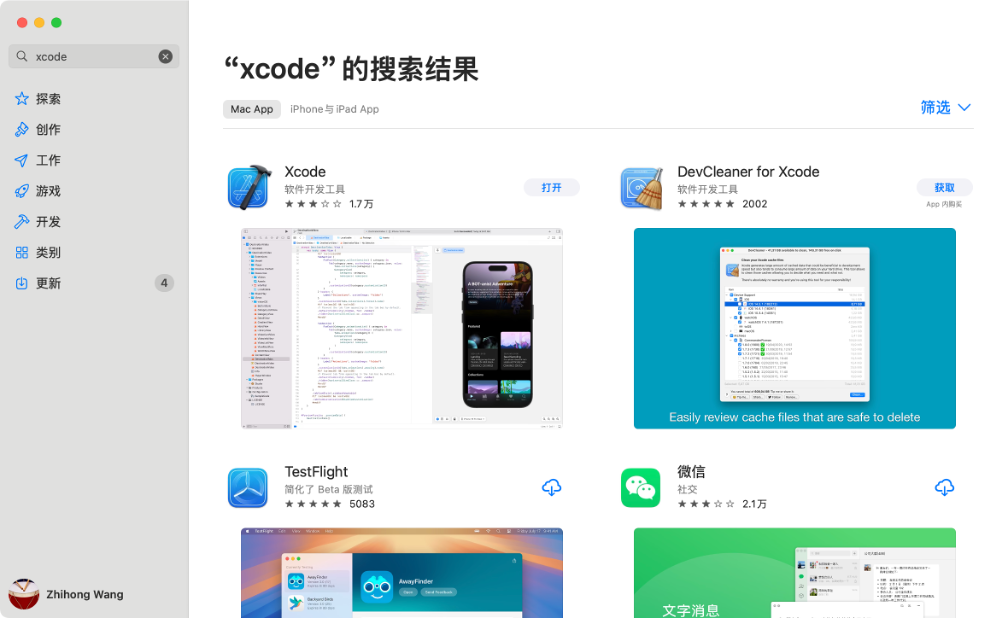

并且接受许可协议，然后安装xcode的命令行工具



```bash
sudo xcode-select -s /Applications/Xcode.app/Contents/Developer  # 确保路径正确
sudo xcodebuild -license accept  # 接受许可证协议
xcode-select --install  # 安装 Xcode 命令行工具
```


2.  安装homebrew，并并通过homebrew安装python和pip



```bash
/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
echo 'eval "$(/opt/homebrew/bin/brew shellenv)"' >> ~/.zshrc
source ~/.zshrc
brew install pyenv
pyenv install 3.10.0
```



3.  安装python3.10。注意不能安装python3.13，因为我们依赖的spacy包不支持python3.13。



```bash
echo 'export PYENV_ROOT="$HOME/.pyenv"' >> ~/.zshrc
echo 'export PATH="$PYENV_ROOT/bin:$PATH"' >> ~/.zshrc
echo 'eval "$(pyenv init --path)"' >> ~/.zshrc
echo 'eval "$(pyenv init -)"' >> ~/.zshrc
pyenv global 3.10.0
python3 -m venv lazyllm
source lazyllm/bin/activate
```

